In [ ]:
# activate R magic
%load_ext rpy2.ipython

#**Análise de Séries Temporais**

zoo - Z's Ordered Observations



In [ ]:
# https://cran.r-project.org/web/packages/zoo/zoo.pdf

Esse pacote possui métodos para indexação totalmente ordenada

Destina-se particularmente a **séries temporais irregulares** de vetores numéricos, matrizes e fatores

In [ ]:
%%R
## Pacote zoo
install.packages("zoo")
library("zoo")

In [ ]:
%%R
?read.zoo

In [6]:
%%R
aapl <- read.zoo("apple.csv", sep = ",", header = TRUE, format = "%Y-%m-%d")

In [8]:
%%R
head(aapl)

2000-01-03 2000-01-04 2000-01-05 2000-01-06 2000-01-07 2000-01-10 
     27.58      25.25      25.62      23.40      24.51      24.08 


In [9]:
%%R
tail(aapl)

2013-04-17 2013-04-18 2013-04-19 2013-04-22 2013-04-23 2013-04-24 
    402.80     392.05     390.53     398.67     406.13     405.46 


In [ ]:
%%R
#View(aapl)

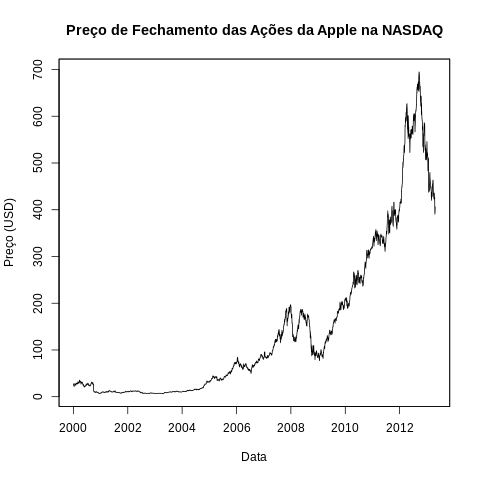

In [10]:
%%R
#Plot
plot(aapl,
     main = "Preço de Fechamento das Ações da Apple na NASDAQ", 
     ylab = "Preço (USD)", 
     xlab = "Data")

##**Cotação Máxima** - Linguagem R base

In [11]:
%%R
# Visualizando o valor mais alto de cotação
aapl[which.max(aapl)]

2012-09-19 
    694.86 


##**Calcular retorno simples**

In [12]:
%%R
# Ao trabalhar com séries temporais, o retorno normalmente é mais importante que o preço
ret_simple <- diff(aapl) / lag(aapl, k = -1) * 100

##**Podemos obter estatísticas {zoo} sobre o retorno simples**

In [ ]:
%%R
# A função coredata do pacote zoo permite extrair apenas os dados (e não as datas) de nosso dataset
?coredata

In [13]:
%%R
# Podemos ver que o valor mínimo de perda foi de 51.86%
summary(coredata(ret_simple))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-51.85888  -1.32475   0.07901   0.12527   1.55332  13.91131 


**Verificando o dia em que ocorreu a maior drawdown:**

Uma pesquisa rápida na internet mostra que no dia que houve a perda, a Apple anunciou redução nos lucros, com valores abaixo do esperado pelo mercado. 

Poderiamos acrescentar esta informação em seu Financial Analytics,
junto com indicadores econômicos da sua própria empresa e/ou de outras empresas concorrentes.

##**Coletar o dia específico do maior drawdown** - which.min

In [14]:
%%R
ret_simple[which.min(ret_simple)]

2000-09-29 
 -51.85888 


##**Visualizando o retorno**

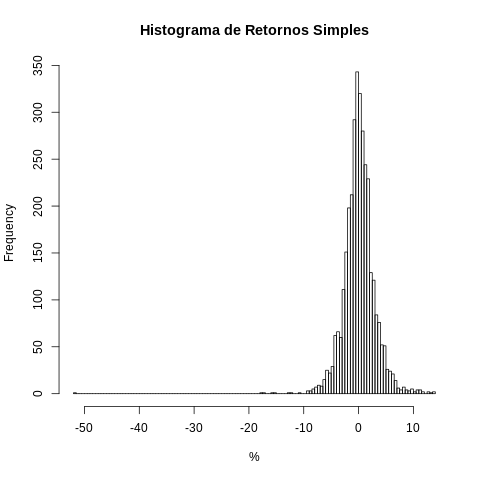

In [16]:
%%R
# Nitidamente tivemos um outlie (-51%), o que impacta na média de retorno das ações da Apple
hist(ret_simple, breaks = 100, main = "Histograma de Retornos Simples", xlab = "%")

##**subset combinado com which.max** - Janela de tempo com consulta

In [17]:
%%R
# Podmeos restringir nossa análise a subset dos dados, 
# em análise de séries temporais, chamamos de window (janela)
# Coletando dados apenas de 2013
aapl_2013 <- window(aapl, start = '2013-01-01', end = '2013-12-31')
aapl_2013[which.max(aapl_2013)]

2013-01-02 
    545.85 


##**Atenção**

Os quartis da distribuição de retorno são interessantes em perspectiva de gestão de risco. 

Podemos, por exemplo, determinar o valor de risco de 1 dia usando esta abordagem. Assim, a probabilidade de que o retorno seja inferior a 7% em qualquer dia é de apenas 1%. 

Mas se este dia ocorrer (e isso ocorrerá aproximadamente 2,5 vezes por ano), 7% é o valor mínimo de perda.

In [18]:
%%R
quantile(ret_simple, 
         probs = 0.01)

       1% 
-7.042678 
